Câu 2. Giảm chiều dữ liệu (2 điểm)
Tập tin ‘Breast Cancer WI.csv’ chứa dữ liệu phân lớp bệnh nhân ung thư (Class  {Benign,
Malignant}) dựa trên 30 thuộc tính.
2.1) Vẽ biểu đồ phân tích phương sai tích lũy theo sự biến thiên của số chiều k. Dựa vào biểu đồ,
chọn giá trị cho k để giảm chiều, với k > 2. Giải thích lý do đã chọn giá trị cho số chiều k.
2.2) Chọn giá trị k nhỏ nhất để phướng sai tích lũy đạt tối thiểu là 99.98%.
2.3) Trực quan hóa dữ liệu với số chiều k = 2.
2.4) Nhận xét kết quả phân lớp. Có thể cải thiện kết quả phân lớp ?

In [1]:
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import seaborn           as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
data   = pd.read_csv('Breast Cancer WI.csv')
data.head()
data['Class'] = data['Class'].replace({'Malignant': 1, 'Benign':0})
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


CÁCH 1: Chọn k dựa trên đồ thị biểu diễn phương sai tích lũy 
-------------------------------------------------------------
* Biến phân lớp: Class
* Số lượng features = 30
  Các features: radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst
Phương pháp ELBOW: Chọn k theo điểm gẫy trên đường cong


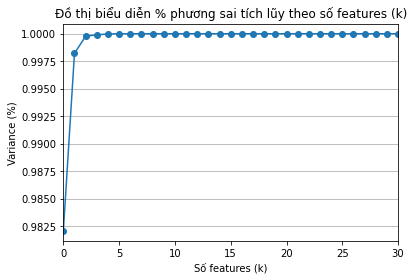

   * k =  1 --> phương sai tích lũy ~ 98.20% , độ tăng ~ 98.20%
   * k =  2 --> phương sai tích lũy ~ 99.82% , độ tăng ~ 1.62%
   * k =  3 --> phương sai tích lũy ~ 99.98% , độ tăng ~ 0.16%
   * k =  4 --> phương sai tích lũy ~ 99.99% , độ tăng ~ 0.01%
   * k =  5 --> phương sai tích lũy ~ 100.00% , độ tăng ~ 0.01%
   * k =  6 --> phương sai tích lũy ~ 100.00% , độ tăng ~ 0.00%
   * k =  7 --> phương sai tích lũy ~ 100.00% , độ tăng ~ 0.00%
   * k =  8 --> phương sai tích lũy ~ 100.00% , độ tăng ~ 0.00%
   * k =  9 --> phương sai tích lũy ~ 100.00% , độ tăng ~ 0.00%
   * k = 10 --> phương sai tích lũy ~ 100.00% , độ tăng ~ 0.00%
   * k = 11 --> phương sai tích lũy ~ 100.00% , độ tăng ~ 0.00%
   * k = 12 --> phương sai tích lũy ~ 100.00% , độ tăng ~ 0.00%
   * k = 13 --> phương sai tích lũy ~ 100.00% , độ tăng ~ 0.00%
   * k = 14 --> phương sai tích lũy ~ 100.00% , độ tăng ~ 0.00%
   * k = 15 --> phương sai tích lũy ~ 100.00% , độ tăng ~ 0.00%
   * k = 16 --> phương sai tích lũy ~ 100.0

In [7]:
#2.1. Chọn k=3 để giữ lại ~99% dữ liệu, và khi k>3 thì phương sai tích lũy cũng không còn tăng nhiều)
print('Chọn k dựa trên đồ thị biểu diễn phương sai tích lũy')
print('-------------------------------------------------------------')
pca = PCA().fit(data)
target = 'Class'
print('* Biến phân lớp:', target)

nb_features = data.shape[1] - 1
features    = data.columns[:nb_features]
print('* Số lượng features = %2d' %nb_features)
print('  Các features:', ', '.join(features)) 

# Vẽ đồ thị biểu diễn % phương sai tích lũy theo số features
print('Phương pháp ELBOW: Chọn k theo điểm gẫy trên đường cong')
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = 'o')
plt.xlabel('Số features (k)')
plt.ylabel('Variance (%)')
plt.title('Đồ thị biểu diễn % phương sai tích lũy theo số features (k)')
plt.xlim([0, nb_features])
plt.grid(axis = 'y')
plt.show()

# Kiểm chứng: Tính phương sai tích lũy theo k
var = 0.0
for k in range(1, nb_features + 1):
    pca = PCA(k)
    pca.fit(data)
      
    newVar = pca.explained_variance_ratio_.sum() * 100
    print('   * k = %2d' %k, '--> phương sai tích lũy ~ %.2f%%' %newVar,
          ', độ tăng ~ %.2f%%' %(newVar - var))
    var = newVar


In [9]:
#2.2
print('Chọn k dựa trên ngưỡng phương sai tích lũy mong muốn ')
print('-------------------------------------------------------------')
threshold = .9998
percent   = threshold * 100

# Chọn giá trị k
pca = PCA(threshold)
pca.fit_transform(data) 

k   = pca.n_components_
var = sum(pca.explained_variance_ratio_) * 100
print('   * Muốn phương sai tích lũy >= %.2f%%' %percent, 'thì k >= %d' %k, '--> %.2f%%' %var, '\n')

print('   * Kiểm chứng: Phân tích chi tiết theo các ngưỡng phương sai')
A = np.array([.5, .6, .7, .8, .9, .95, .98, .99])
for x in A:
    percent = x * 100
    pca     = PCA(x)

    pca.fit(data)
    k   = pca.n_components_
    var = sum(pca.explained_variance_ratio_) * 100
    print('      - Muốn phương sai tích lũy >= %.2f%%' %percent, 'thì k >= %2d' %k,
          '(var ~ %.2f%%)' %var)


CÁCH 2: Chọn k dựa trên ngưỡng phương sai tích lũy mong muốn 
-------------------------------------------------------------
   * Muốn phương sai tích lũy >= 99.98% thì k >= 4 --> 99.99% 

   * Kiểm chứng: Phân tích chi tiết theo các ngưỡng phương sai
      - Muốn phương sai tích lũy >= 50.00% thì k >=  1 (var ~ 98.20%)
      - Muốn phương sai tích lũy >= 60.00% thì k >=  1 (var ~ 98.20%)
      - Muốn phương sai tích lũy >= 70.00% thì k >=  1 (var ~ 98.20%)
      - Muốn phương sai tích lũy >= 80.00% thì k >=  1 (var ~ 98.20%)
      - Muốn phương sai tích lũy >= 90.00% thì k >=  1 (var ~ 98.20%)
      - Muốn phương sai tích lũy >= 95.00% thì k >=  1 (var ~ 98.20%)
      - Muốn phương sai tích lũy >= 98.00% thì k >=  1 (var ~ 98.20%)
      - Muốn phương sai tích lũy >= 99.00% thì k >=  2 (var ~ 99.82%)


*** c) Giảm chiều còn k = 2 và trực quan hóa dữ liệu      ***


<Figure size 576x576 with 0 Axes>

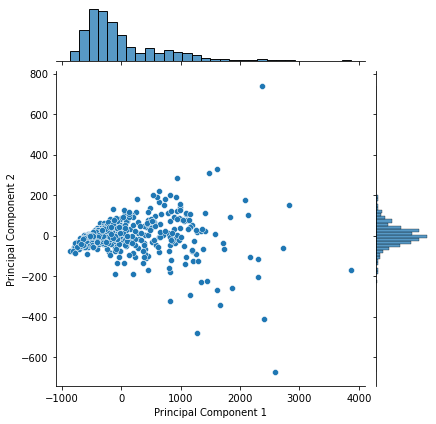


* Ma trận B_T (có thêm biến phân lớp Class)
   Principal Component 1  Principal Component 2  Class
0            1160.142744            -293.917535      1
1            1269.122597              15.630194      1
2             995.794082              39.156723      1
3            -407.180411             -67.380505      1
4             930.341382             189.340710      1 



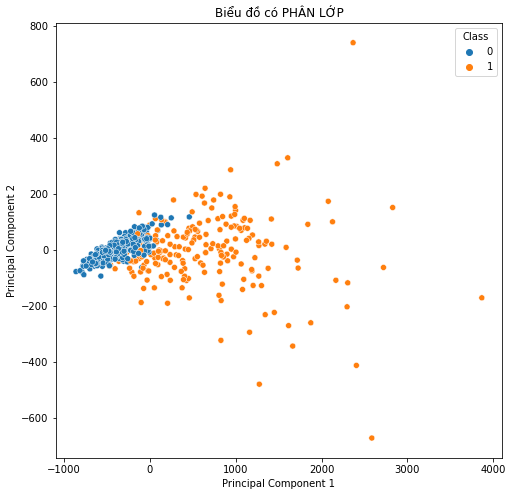

In [12]:
#2.3
print('Giảm chiều còn k = 2 và trực quan hóa dữ liệu')
print('=============================================================')
k   = 2
pca = PCA(k)
pca.fit(data)

PC_name  = ['Principal Component 1', 'Principal Component 2']

B           = pca.transform(data)
principalDf = pd.DataFrame(data = B, columns = PC_name)

# Trực quan hóa dữ liệu (KHÔNG phân lớp)
plt.figure(figsize = (8, 8))
sns.jointplot(x = PC_name[0], y = PC_name[1], data = principalDf)              
plt.show()

y = np.array(data.Class)
y = pd.DataFrame(data = y, columns = [target])

finalDf = pd.concat([principalDf, y], axis = 1)
print('\n* Ma trận B_T (có thêm biến phân lớp Class)')
print(finalDf.head(), '\n')

# Trực quan hóa dữ liệu (có PHÂN LỚP)
plt.figure(figsize = (8, 8))
plt.title('Biểu đồ có PHÂN LỚP')
sns.scatterplot(x = PC_name[0], y = PC_name[1], data = finalDf, hue = target, legend = 'full')              
plt.show()
 




*** d) CHUẨN HÓA dữ liệu, sau đó thực hiện PCA       ***


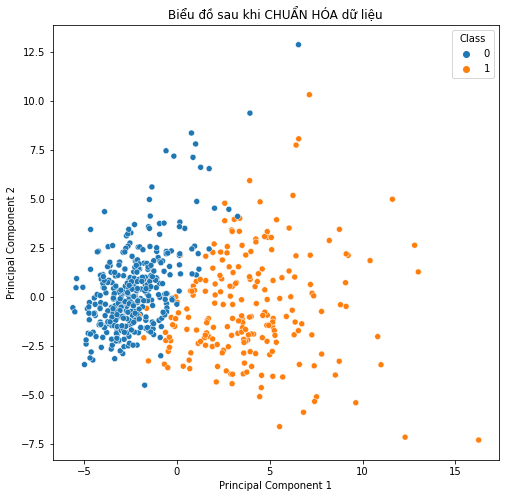

In [13]:
#Dữ liệu của phân lớp "Malignant" tập trung dày đặc, không phân tán tốt ---> xử lý dữ liệu
print('\n========================================================')
print('*** d) CHUẨN HÓA dữ liệu, sau đó thực hiện PCA       ***')
print('========================================================')
pca_norm  = PCA(k)
data_norm = StandardScaler().fit_transform(data)
pca_norm.fit(data_norm)

B_norm           = pca_norm.transform(data_norm)
principalDf_norm = pd.DataFrame(data = B_norm, columns = PC_name)

y = np.array(data.Class)
y = pd.DataFrame(data = y, columns = [target])

finalDf_norm = pd.concat([principalDf_norm, y], axis = 1)

# Trực quan hóa dữ liệu (có PHÂN LỚP)
plt.figure(figsize = (8, 8))
plt.title('Biểu đồ sau khi CHUẨN HÓA dữ liệu')
sns.scatterplot(x = PC_name[0], y = PC_name[1], data = finalDf_norm, hue = target, legend = 'full')
plt.show()

